In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\sample_submission.csv..csv")
df.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


In [3]:
train = pd.read_csv(r"D:\train.csv")
test= pd.read_csv(r"D:\test.csv")

In [4]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0


In [5]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0,1,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1,0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1,0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1,0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1,0,139431.00


In [6]:
df.shape

(110023, 2)

In [7]:
train.shape

(165034, 14)

In [8]:
test.shape

(110023, 13)

In [9]:
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# Data Understandinng


1. id=> abbreviation for identification

2. CustomerId=> a unique alphanumeric identifier assigned to an individual or entity by a company or organization.


3. Surname=> the name that a person has in common with other family members, as distinguished from a given name or Christian name;


4. CreditScore=> a prediction of your credit behavior, such as how likely you are to pay a loan back on time, based on information from your credit reports.


5. Geography=> the study of places and the relationships between people and their environments.

6. Gender=> Male / Female

7. Age=> at the time of being a specified age.

8. Tenure=> the act, right, manner, or term of holding something (as property, a position, or an office)


9. Balance=> a state of equilibrium or equipoise; equal distribution of weight, amount, etc.

10. NumOfProducts=> the result of multiplying two or more numbers together.

11. HasCrCard=> the number of paying customers who fail to become repeat customers.

12. IsActiveMember=> An employee who is contriAn employee who is contributing (or has contributions made on their behalf) to a pension scheme.buting (or has contributions made on their behalf) to a pension scheme.


13. EstimatedSalary=> display a range for annual base or hourly pay and are specific to job title, company, and location.

14. Exited=> 

In [10]:
df['id'].value_counts()

165034    1
238392    1
238390    1
238389    1
238388    1
         ..
201705    1
201704    1
201703    1
201702    1
275056    1
Name: id, Length: 110023, dtype: int64

In [11]:
df['id'].nunique()

110023

In [12]:
train['CustomerId'].value_counts()

15682355    121
15570194     99
15585835     98
15595588     91
15648067     90
           ... 
15635203      1
15806982      1
15691104      1
15624936      1
15815050      1
Name: CustomerId, Length: 23221, dtype: int64

In [13]:
train['CustomerId'].nunique()

23221

In [14]:
train['Surname'].value_counts()

Hsia         2456
T'ien        2282
Hs?          1611
Kao          1577
Maclean      1577
             ... 
Samaniego       1
Lawley          1
Bonwick         1
Tennant         1
Elkins          1
Name: Surname, Length: 2797, dtype: int64

In [15]:
train['Surname'].nunique()

2797

In [16]:
train['CreditScore'].value_counts()

850    2532
678    2299
684    1718
667    1658
705    1605
       ... 
419       1
386       1
358       1
423       1
373       1
Name: CreditScore, Length: 457, dtype: int64

In [17]:
train['CreditScore'].nunique()

457

In [18]:
train['Geography'].value_counts()

France     94215
Spain      36213
Germany    34606
Name: Geography, dtype: int64

In [19]:
train['Geography'].nunique()

3

In [20]:
train['Gender'].value_counts()

Male      93150
Female    71884
Name: Gender, dtype: int64

In [21]:
train['Gender'].nunique()

2

In [22]:
train['Age'].value_counts()

37.00    9255
38.00    9246
35.00    9118
34.00    8625
36.00    8556
         ... 
84.00       4
83.00       3
85.00       3
36.44       1
32.34       1
Name: Age, Length: 71, dtype: int64

In [23]:
train['Age'].nunique()

71

In [24]:
train['Tenure'].value_counts()

2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: Tenure, dtype: int64

In [25]:
train['Tenure'].nunique()

11

In [26]:
train['Balance'].value_counts()

0.00         89648
124577.33       88
127864.40       64
122314.50       63
129855.32       59
             ...  
125824.21        1
158741.56        1
126815.52        1
61172.57         1
110993.29        1
Name: Balance, Length: 30075, dtype: int64

In [27]:
train['Balance'].nunique()

30075

In [28]:
train['NumOfProducts'].value_counts()


2    84291
1    77374
3     2894
4      475
Name: NumOfProducts, dtype: int64

In [29]:
train['NumOfProducts'].nunique()

4

In [30]:
train['HasCrCard'].value_counts()

1    124428
0     40606
Name: HasCrCard, dtype: int64

In [31]:
train['IsActiveMember'].nunique()

2

In [32]:
train['EstimatedSalary'].value_counts()

88890.05     178
140941.47    107
167984.72    100
90876.95      98
129964.94     98
            ... 
102747.73      1
170593.45      1
109179.48      1
60538.47       1
71173.03       1
Name: EstimatedSalary, Length: 55298, dtype: int64

In [33]:
train['EstimatedSalary'].nunique()

55298

In [34]:
# Drop specified columns in-place
train.drop(['id', 'CustomerId','Surname'], axis=1, inplace=True)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  int64  
 8   IsActiveMember   165034 non-null  int64  
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 13.9+ MB


In [36]:
continuous_variables = []
discrete_categorical_variables = []
discrete_count_variables = []

for column in train.columns:
    if train[column].dtype in ['int64', 'float64']:
        if len(train[column].unique()) > 20:
            continuous_variables.append(column)
        else:
            if len(train[column].unique()) <= 10:
                discrete_count_variables.append(column)
            else:
                discrete_categorical_variables.append(column)
    elif train[column].dtype == 'object':
        discrete_categorical_variables.append(column)

for column in test.columns:
    if test[column].dtype in ['int64', 'float64']:
        if len(test[column].unique()) > 20:
            continuous_variables.append(column)
        else:
            if len(test[column].unique()) <= 10:
                discrete_count_variables.append(column)
            else:
                discrete_categorical_variables.append(column)
    elif test[column].dtype == 'object':
        discrete_categorical_variables.append(column)

print("Continuous Variables:", continuous_variables)
print("Discrete Categorical Variables:", discrete_categorical_variables)
print("Discrete Count Variables:", discrete_count_variables)

Continuous Variables: ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'id', 'CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']
Discrete Categorical Variables: ['Geography', 'Gender', 'Tenure', 'Surname', 'Geography', 'Gender', 'Tenure']
Discrete Count Variables: ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']


In [37]:
continuous_variables = list(set(continuous_variables))
discrete_categorical_variables = list(set(discrete_categorical_variables))
discrete_count_variables = list(set(discrete_count_variables))

print("Continuous Variables:", continuous_variables)
print("Discrete Categorical Variables:", discrete_categorical_variables)
print("Discrete Count Variables:", discrete_count_variables)


Continuous Variables: ['EstimatedSalary', 'CustomerId', 'Age', 'id', 'Balance', 'CreditScore']
Discrete Categorical Variables: ['Gender', 'Geography', 'Surname', 'Tenure']
Discrete Count Variables: ['IsActiveMember', 'HasCrCard', 'Exited', 'NumOfProducts']


In [38]:
continuous_variables = []

for column in train.columns:
    if train[column].dtype in ['int64', 'float64']:
        if len(train[column].unique()) > 20:
            continuous_variables.append(column)
continuous_variable_stats = train[continuous_variables].describe()

print("Continuous Variables:")
print(continuous_variable_stats)

Continuous Variables:
         CreditScore            Age        Balance  EstimatedSalary
count  165034.000000  165034.000000  165034.000000    165034.000000
mean      656.454373      38.125888   55478.086689    112574.822734
std        80.103340       8.867205   62817.663278     50292.865585
min       350.000000      18.000000       0.000000        11.580000
25%       597.000000      32.000000       0.000000     74637.570000
50%       659.000000      37.000000       0.000000    117948.000000
75%       710.000000      42.000000  119939.517500    155152.467500
max       850.000000      92.000000  250898.090000    199992.480000


# Exploratory Data Analysis(EDA)

## for continous Variable

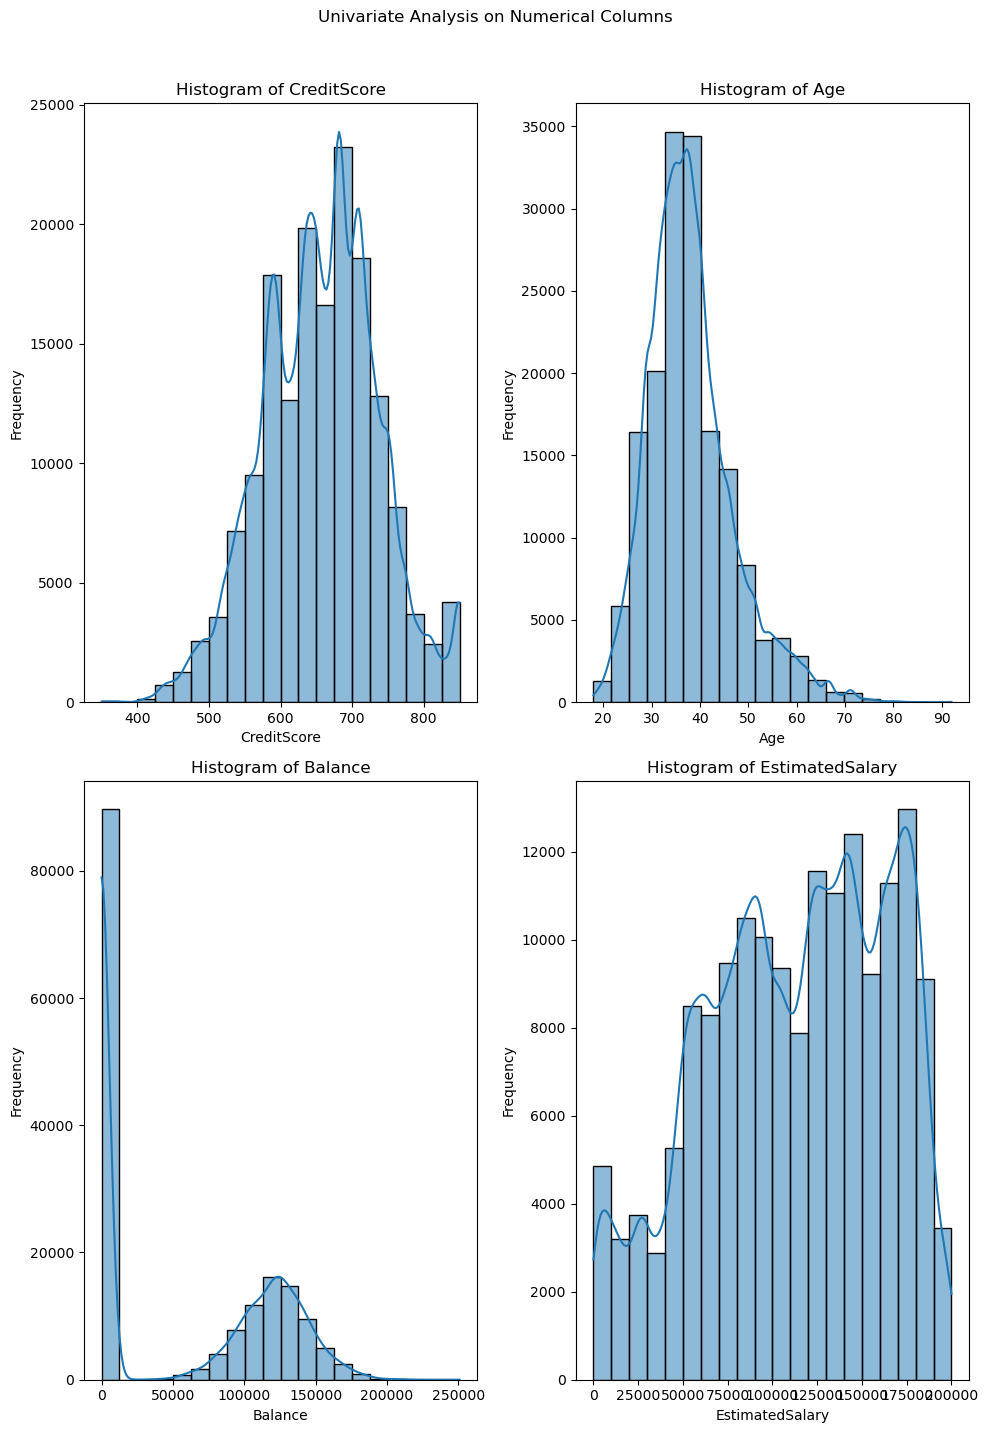

In [39]:
continuous_variables = []
for column in train.columns:
    if train[column].dtype in ['int64', 'float64']:
        if len(train[column].unique()) > 20:
            continuous_variables.append(column)
num_plots = len(continuous_variables)
num_cols = 2  
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 14))
fig.suptitle('Univariate Analysis on Numerical Columns', y=1.02)

for i, variable in enumerate(continuous_variables):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(train[variable], bins=20, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {variable}')
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

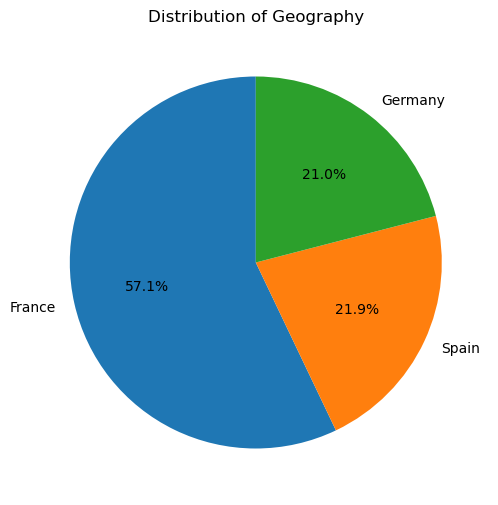

In [40]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Geography' is the column
geography_counts = train['Geography'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 8))
plt.pie(geography_counts, labels=geography_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Geography')
plt.show()

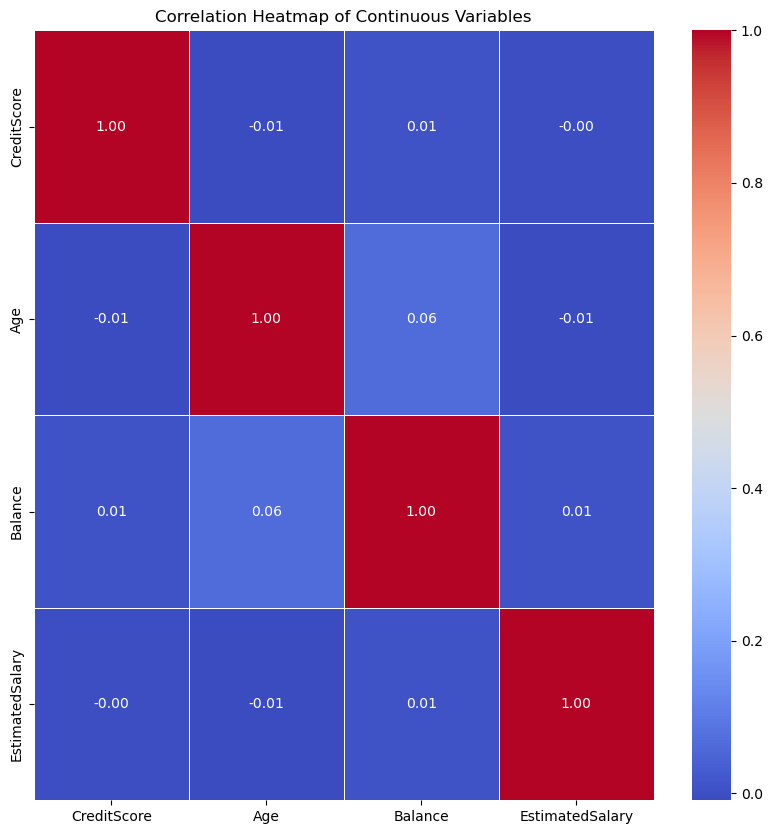

In [41]:
continuous_variables = []

for column in train.columns:
    if train[column].dtype in ['int64', 'float64']:
        if len(train[column].unique()) > 20:
            continuous_variables.append(column)

# Check if there are any continuous variables
if not continuous_variables:
    print("No continuous variables found.")
else:
    correlation_matrix = train[continuous_variables].corr()

    # Check if correlation_matrix has data
    if correlation_matrix.empty:
        print("Correlation matrix is empty.")
    else:
        plt.figure(figsize=(10, 10))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Correlation Heatmap of Continuous Variables')
        plt.show()


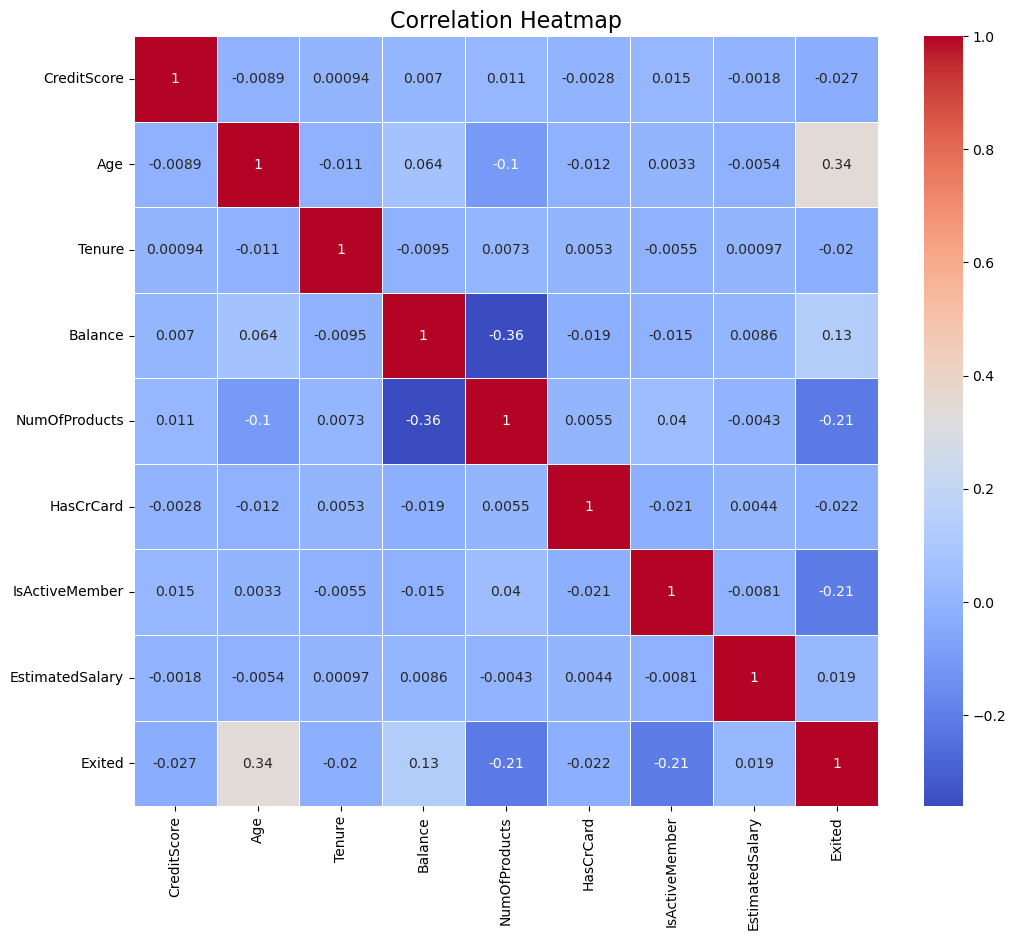

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame
# If needed, select only the numeric columns for correlation analysis
numeric_columns = train.select_dtypes(include='number')

# Create a correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Show values in each cell
    cmap='coolwarm',  # Choose a color map
    linewidths=.5  # Set linewidth between cells
)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()


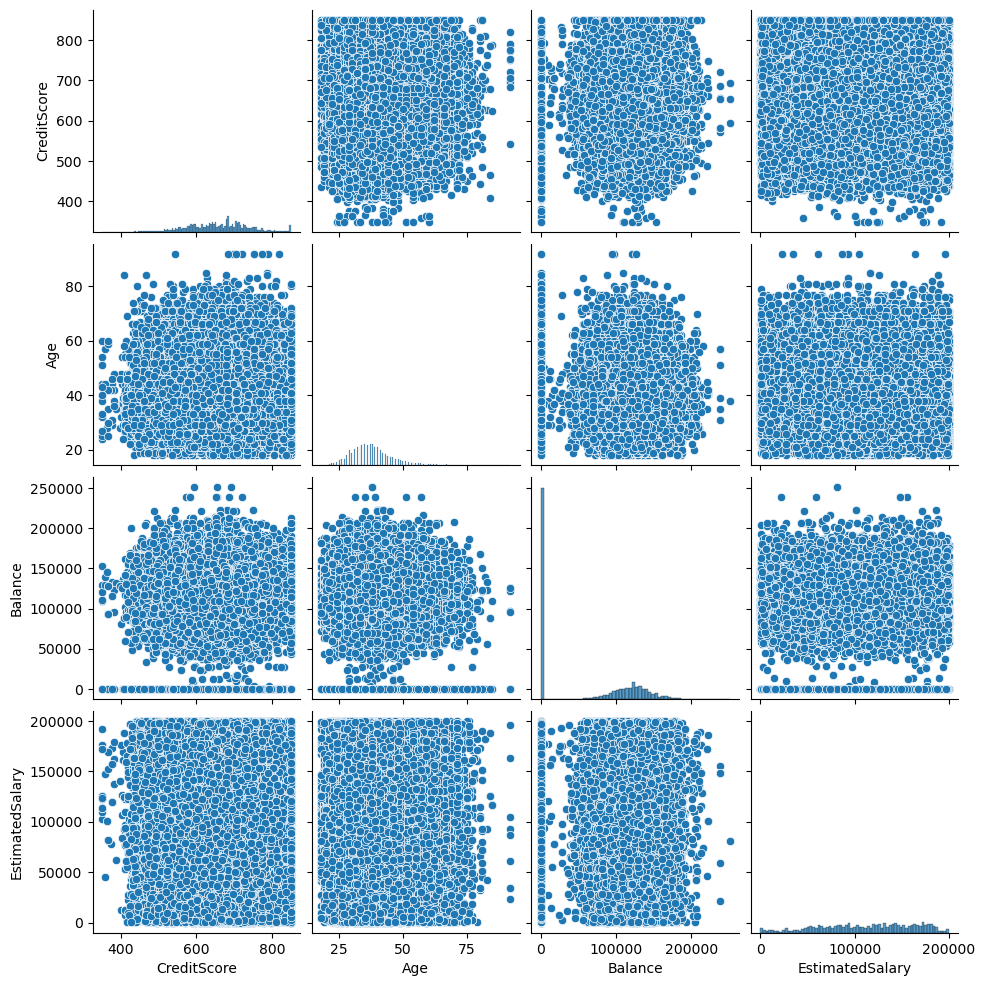

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train is your DataFrame
continuous_variables = []

# Loop through columns in the train DataFrame
for column in train.columns:
    # Check if the column has a numeric data type (int64 or float64)
    if train[column].dtype in ['int64', 'float64']:
        # Check if the number of unique values is greater than 20
        if len(train[column].unique()) > 20:
            continuous_variables.append(column)

# Create a pairplot for the selected continuous variables in the 'train' DataFrame
sns.pairplot(train[continuous_variables])

# Display the pairplot
plt.show()


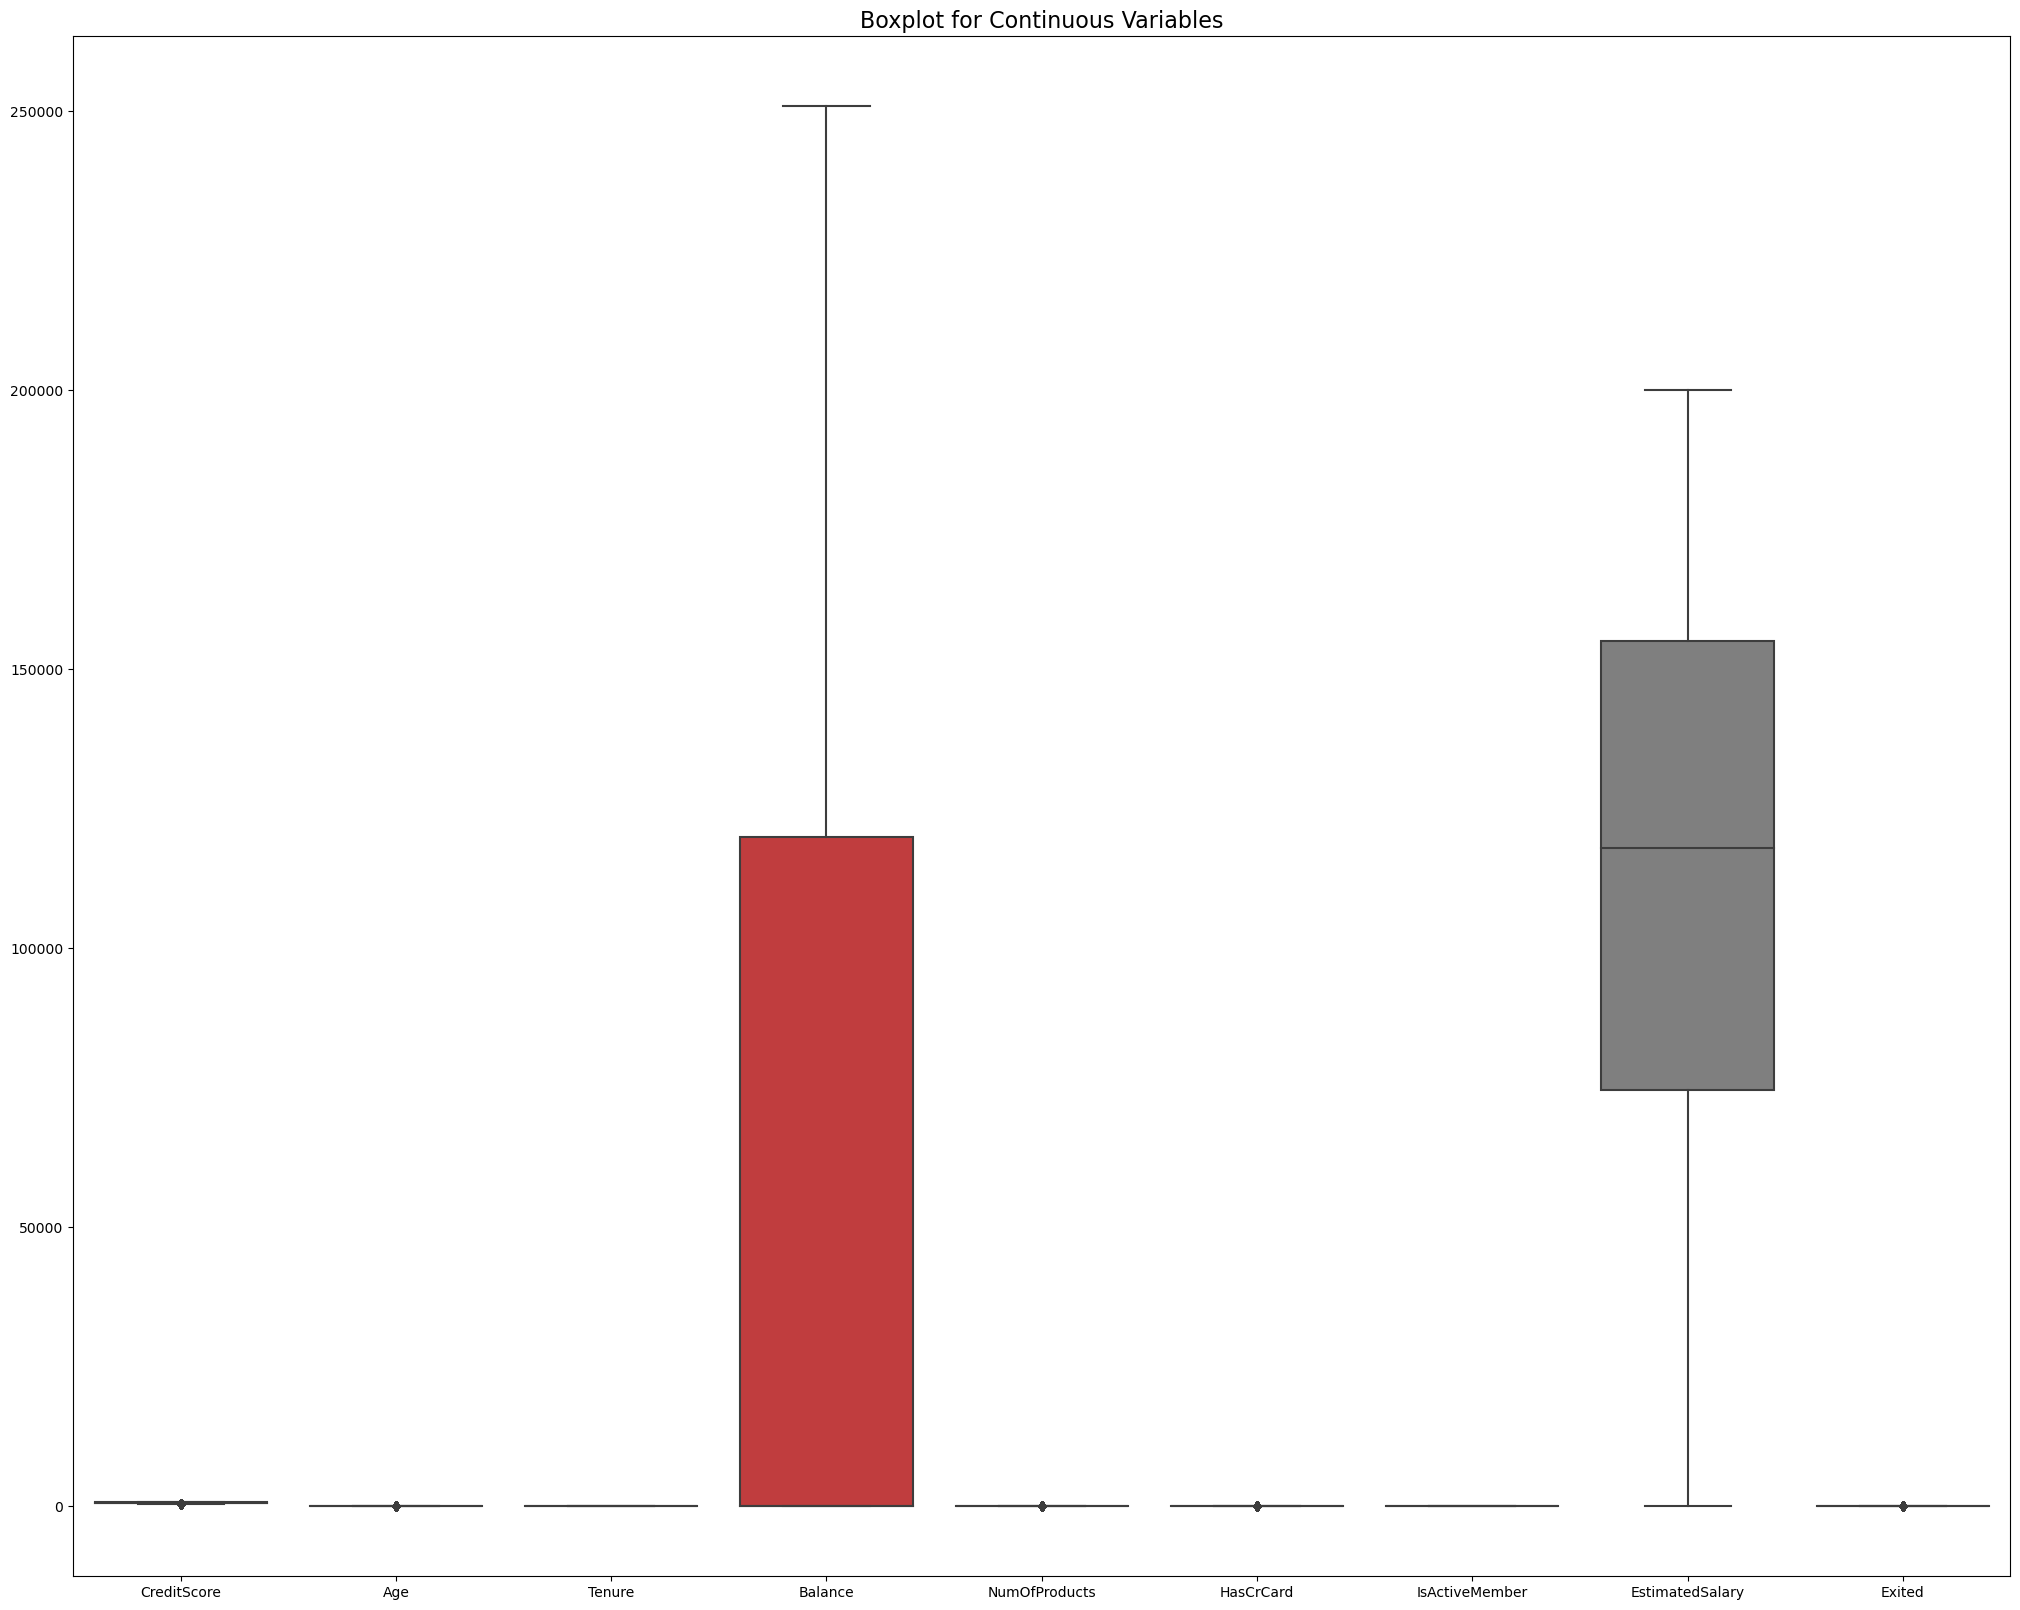

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame
# If needed, select only the numeric columns for boxplot analysis
numeric_columns = train.select_dtypes(include='number')

# Create a boxplot using seaborn
plt.figure(figsize=(25, 20))
sns.boxplot(data=numeric_columns)

plt.title("Boxplot for Continuous Variables", fontsize=16)
plt.show()


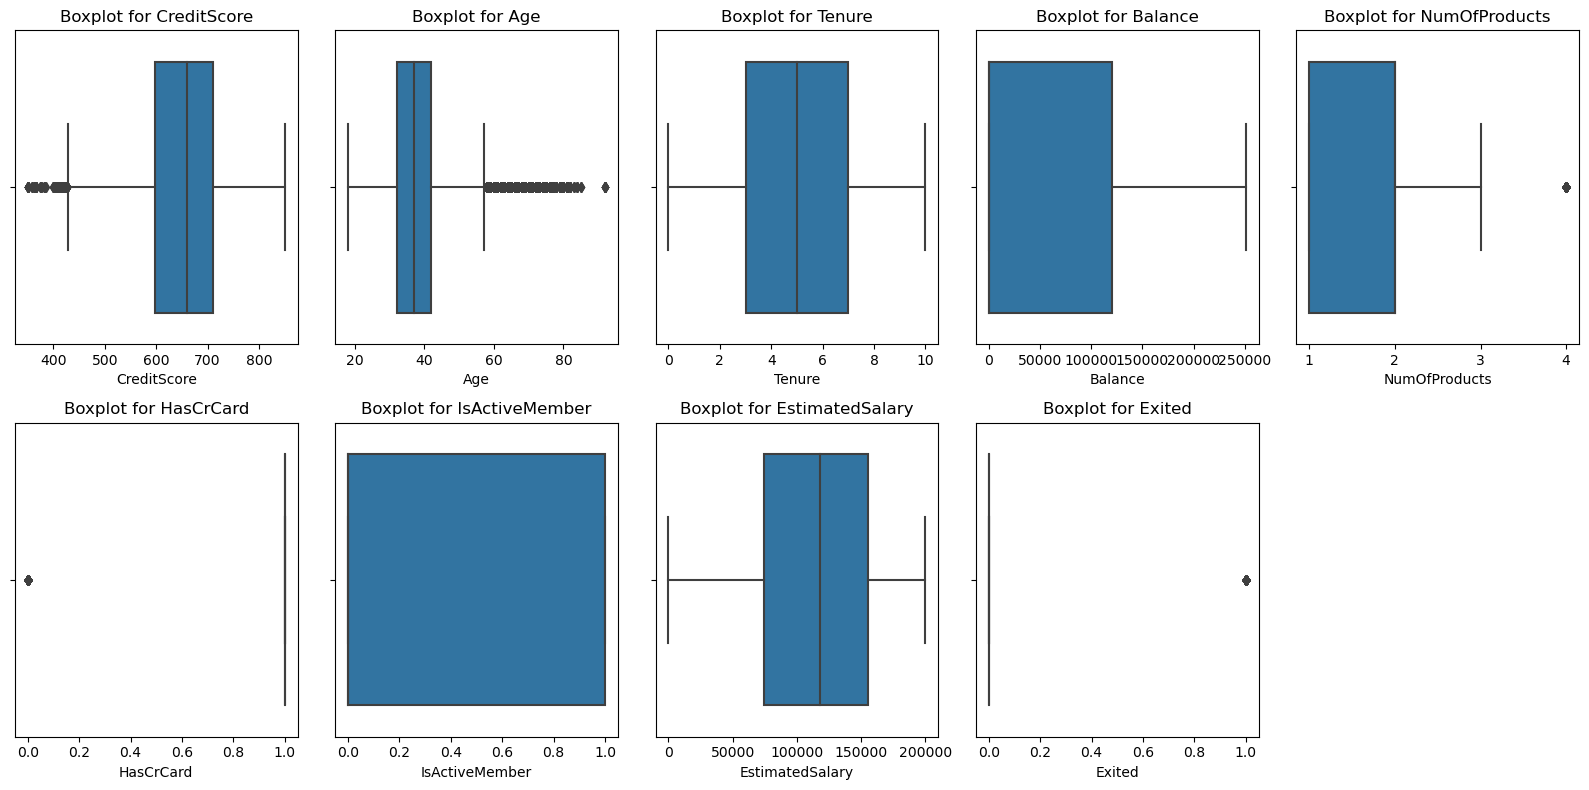

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame
# If needed, select only the numeric columns for boxplot analysis
numeric_columns = train.select_dtypes(include='number')

# Create subplots for each continuous variable
plt.figure(figsize=(16, 8))

# Specify the number of subplots and their arrangement
num_subplots = len(numeric_columns.columns)
num_rows = 2  # Adjust as needed
num_cols = num_subplots // num_rows + (num_subplots % num_rows > 0)

# Create subplots using a loop
for i, column in enumerate(numeric_columns.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=column, data=train)
    plt.title(f"Boxplot for {column}")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


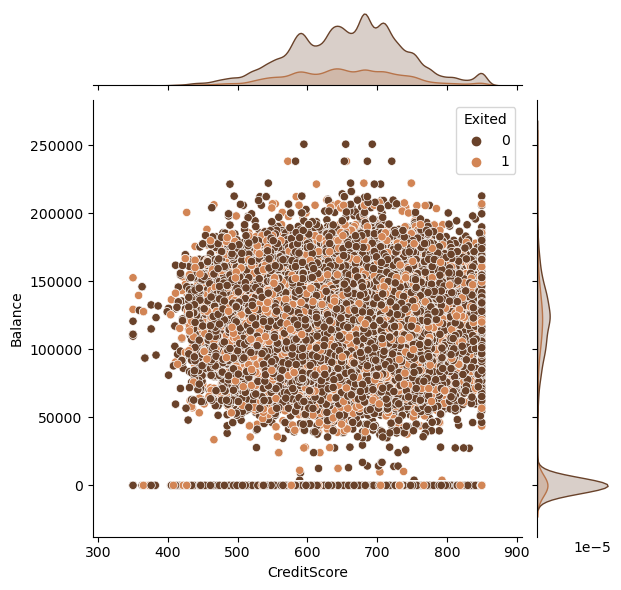

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_data is your DataFrame
sns.jointplot(data=train, x="CreditScore", y="Balance", hue="Exited", palette="copper")
plt.show()


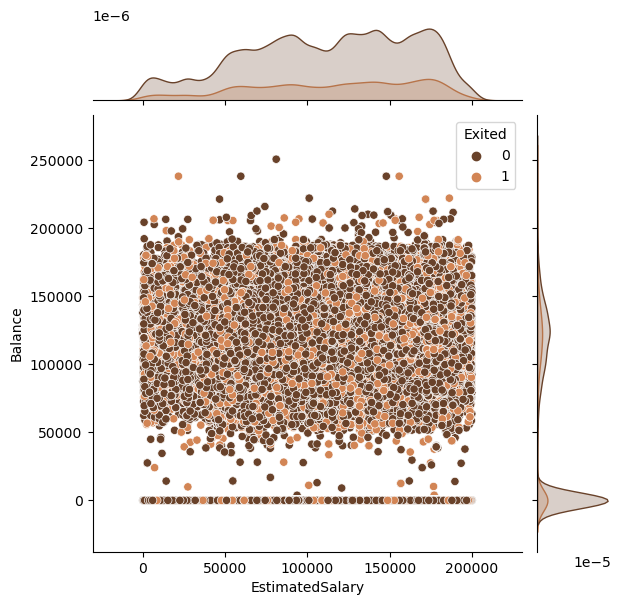

In [47]:
sns.jointplot(data=train, x="EstimatedSalary", y="Balance", hue = "Exited", palette = "copper");


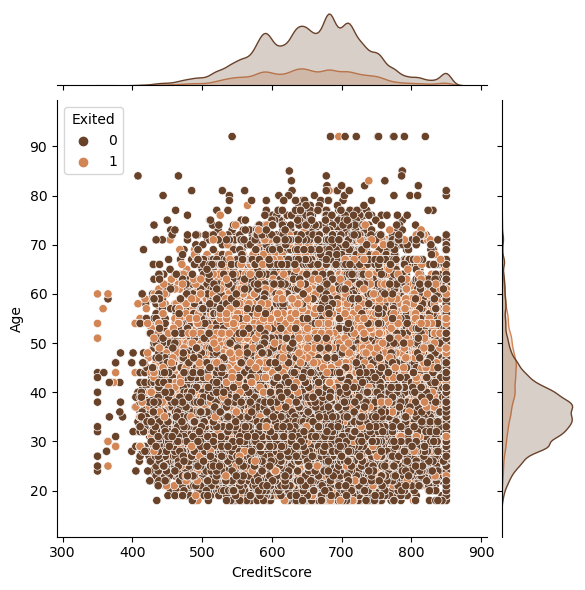

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_data is your DataFrame
sns.jointplot(data=train, x="CreditScore", y="Age", hue="Exited", palette="copper")
plt.show()

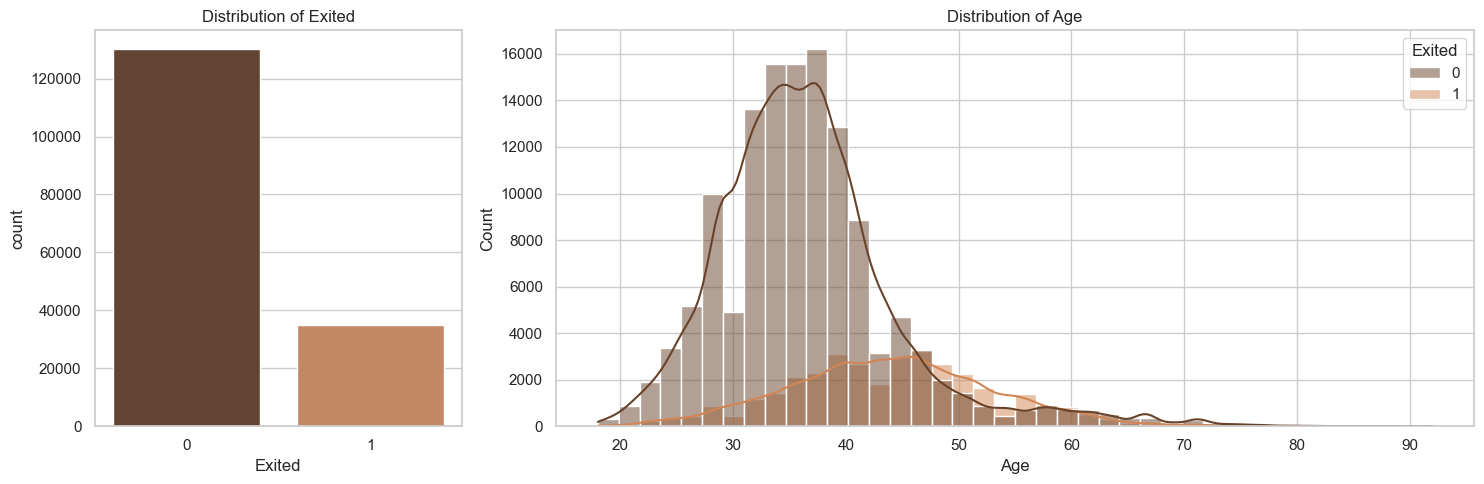

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the overall style for the plots
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 2.5]})

# Plot the count distribution of 'Exited' in the first subplot
plt.subplot(1, 2, 1)
sns.countplot(data=train, x="Exited", palette="copper")
plt.title("Distribution of Exited")

# Plot the age distribution with 'Exited' as hue in the second subplot
plt.subplot(1, 2, 2)
sns.histplot(data=train, x="Age", hue="Exited", bins=40, kde=True, palette="copper")
plt.title("Distribution of Age")

# Adjust layout and display the figure
plt.tight_layout()
plt.show()


In [50]:
# Assuming you have a list of discrete categorical variables named 'discrete_categorical'
discrete_categorical = ['Geography', 'Gender', 'Tenure']

# Now you can use it to select columns from the 'train' DataFrame
selected_columns = train[discrete_categorical]

# Custom aggregation function for summary statistics
def custom_summary_stats(column):
    return column.describe(percentiles=[0.25, 0.5, 0.75])

# Display summary statistics for each discrete categorical variable
summary_stats = selected_columns.agg(custom_summary_stats)

# Print the summary statistics
print(summary_stats)


       Geography  Gender         Tenure
25%          NaN     NaN       3.000000
50%          NaN     NaN       5.000000
75%          NaN     NaN       7.000000
count     165034  165034  165034.000000
freq       94215   93150            NaN
max          NaN     NaN      10.000000
mean         NaN     NaN       5.020353
min          NaN     NaN       0.000000
std          NaN     NaN       2.806159
top       France    Male            NaN
unique         3       2            NaN


# Data Cleaning

In [51]:
train.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [52]:
train.isnull().sum()/len(df)*100

CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [53]:
train[train.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
14256,595,Spain,Male,35.0,8,0.00,1,0,1,100015.79,0
14736,535,France,Male,33.0,3,133040.32,1,1,1,110299.78,0
21512,449,Spain,Female,33.0,8,0.00,2,1,0,156792.89,0
27134,532,France,Male,36.0,4,0.00,1,1,1,132798.78,0
30350,731,France,Male,43.0,2,0.00,2,1,1,170034.95,0
...,...,...,...,...,...,...,...,...,...,...,...
163101,749,France,Male,49.0,1,139290.41,1,1,0,182855.42,0
163785,589,Spain,Male,45.0,1,0.00,2,0,0,125939.22,0
164350,614,Spain,Male,66.0,2,0.00,2,1,1,180082.70,0
164596,682,France,Male,37.0,5,0.00,2,1,1,112554.68,0


In [54]:
train[train.duplicated()].nunique()/100

CreditScore        0.96
Geography          0.03
Gender             0.02
Age                0.38
Tenure             0.11
Balance            0.54
NumOfProducts      0.03
HasCrCard          0.02
IsActiveMember     0.02
EstimatedSalary    1.20
Exited             0.02
dtype: float64

In [55]:
train.drop_duplicates(inplace=True, ignore_index=True)


In [56]:
train[train.duplicated()].nunique()/100

CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

### labale Encodeing

In [57]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

train['Gender'] = encoder.fit_transform(train['Gender'])
train['Geography'] = encoder.fit_transform(train['Geography'])


### data type conversion

In [83]:
train = []
test = []
cv=[]
for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    lr_model = LogisticRegression()
    lr_model.fit(X_train,y_train)

    # Prediction
    train_pred = lr_model.predict(X_train)
    test_pred = lr_model.predict(X_test)

    # Evaluation

    train.append(lr_model.score(X_train,y_train))
    test.append(lr_model.score(X_test,y_test))
    cv.append(cross_val_score(lr_model,X,y,cv=5).mean())
em = pd.DataFrame({"Train":train,"test":test,"CV":cv})
gm = em[(abs(em['Train']-em['test'])<=0.05) & abs(em['test']-em['CV']<=0.05)]
gm[gm['test']==gm['test'].max()].index.tolist()[0]

9

## X & Y

In [58]:
x=df.drop(columns=['Exited'],axis=1).values
y=df['Exited'].values

In [59]:
x

array([[165034],
       [165035],
       [165036],
       ...,
       [275054],
       [275055],
       [275056]], dtype=int64)

In [60]:
y

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

### identify the best random state number

In [61]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [62]:
x= scaler.fit_transform(x)

In [63]:
x

array([[-1.73203507],
       [-1.73200358],
       [-1.73197209],
       ...,
       [ 1.73197209],
       [ 1.73200358],
       [ 1.73203507]])

## train | test split

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
import numpy as np
from sklearn.preprocessing import StandardScaler

if x_train.shape[1] >= 8:
    scaler = StandardScaler()
    x_train[:, 1:8] = scaler.fit_transform(x_train[:, 1:8])
    x_test[:, 1:8] = scaler.transform(x_test[:, 1:8])

    


# Modellinng

## Logistic Regression

In [66]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Generate some sample data
# Replace X and y with your actual data
# X should be your feature matrix, and y should be your target variable (labels)
np.random.seed(42)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.70      0.82        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20



## 1. Evaluation

In [67]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Load or prepare your data
# Example using the load_digits function from sklearn.datasets
digits = load_digits()
X, y = digits.data, digits.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the training data
ypred_train = log_reg.predict(X_train)
print("Train accuracy:", accuracy_score(y_train, ypred_train))

# Predict on the test data
ypred_test = log_reg.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, ypred_test))

# Cross-validation on the training data
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print("CV Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Train accuracy: 1.0
Test accuracy: 0.9694444444444444
CV Scores: [0.95833333 0.96180556 0.95121951 0.96515679 0.93379791]
Mean CV Score: 0.9540626209833526


## Confusion Matrix

In [68]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and ypred_test are your true labels and predicted labels
cm = confusion_matrix(y_test, ypred_test)
print(cm)


[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 44  0  1  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


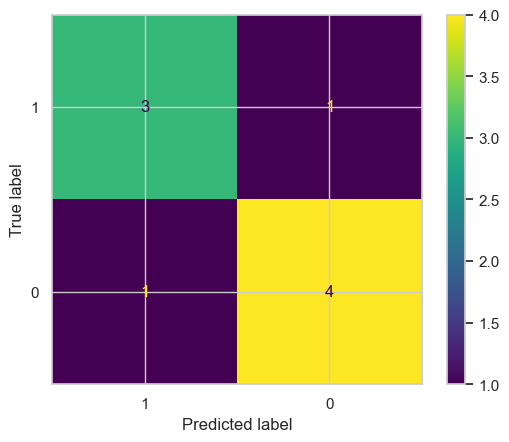

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd  # Don't forget to import pandas

# Example data, replace with your actual labels
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1]
y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1]

# Assuming df is your DataFrame with a column "Exited"
df = pd.DataFrame({"Exited": [1, 0, 1, 0, 1, 0, 1, 0, 1]})

cm = confusion_matrix(y_true, y_pred)

# Assuming df["Exited"].unique() contains the unique labels for your classes
labels = df["Exited"].unique()

# Create a ConfusionMatrixDisplay object and plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()


In [70]:
from sklearn.metrics import classification_report

# Assuming y_test and ypred_test are your true labels and predicted labels
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.96      0.98        46
           5       0.92      0.94      0.93        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



# ROC Curve

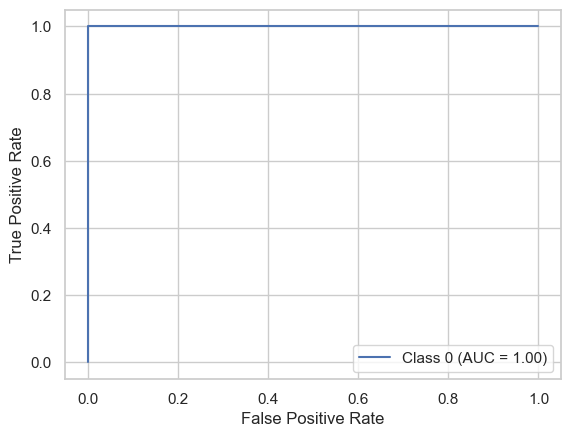

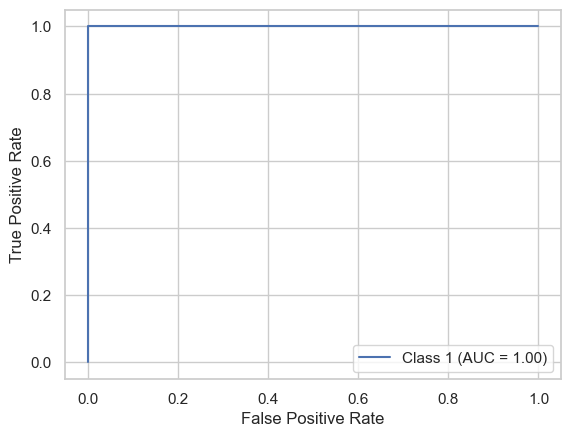

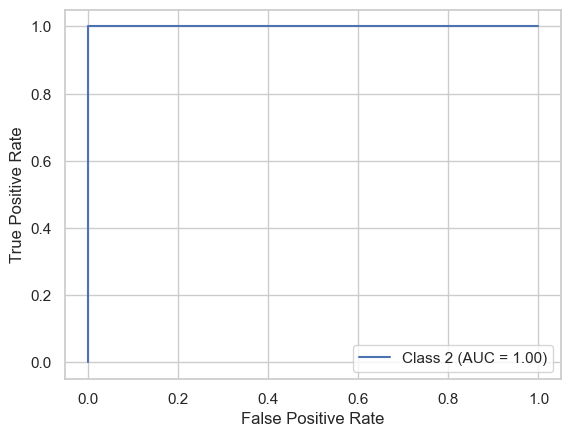

In [71]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

# Example data, replace with your actual labels and predictions
y_test = [0, 1, 2, 2, 1, 0, 2, 1, 0]
ypred_test = [0, 1, 2, 2, 1, 0, 2, 1, 0]

# Binarize the labels for multiclass ROC curve
y_test_bin = label_binarize(y_test, classes=list(set(y_test)))
ypred_test_bin = label_binarize(ypred_test, classes=list(set(y_test)))

# Compute ROC curve and ROC area for each class using One-vs-Rest
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = len(set(y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], ypred_test_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
for i in range(n_classes):
    RocCurveDisplay(fpr=fpr[i], tpr=tpr[i], roc_auc=roc_auc[i], estimator_name=f'Class {i}').plot()

plt.show()


# 2. KNN

In [72]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assume you have your dataset and labels, replace X and y with your actual data
# X should be a 2D array-like structure (features), and y should be the corresponding labels
# For example, X could be a list of lists or a NumPy array, and y could be a list or NumPy array.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNeighborsClassifier with the desired number of neighbors (n_neighbors)
k_neighbors = 3  # You can adjust this value based on your requirements
knn_classifier = KNeighborsClassifier(n_neighbors=k_neighbors)

# Train the model on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)

# Evaluate the accuracy of the model on the test set
accuracy_test = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy_test:.2f}')

# Perform cross-validation to get a more robust estimate of performance
cv_scores = cross_val_score(knn_classifier, X, y, cv=5)  # 5-fold cross-validation, you can adjust the number of folds
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}')


Test Accuracy: 0.98
Cross-Validation Scores: [0.95555556 0.95833333 0.96657382 0.98607242 0.96657382]
Mean Cross-Validation Accuracy: 0.97


# 3. Support Vector Machine (SVM)

In [73]:
from sklearn.svm import SVC

estimator = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly']}

from sklearn.model_selection import GridSearchCV
svm_model = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
svm_model.fit(X_train,y_train)

svm_model = svm_model.best_estimator_

ypred_train = svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)

print('Train Accuracy:',accuracy_score(ypred_train,y_train))
print('Cross validation score:',cross_val_score(svm_model,X_train,y_train,cv=5,scoring='accuracy'))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))

Train Accuracy: 0.9979123173277662
Cross validation score: [0.98611111 0.98611111 0.9825784  0.99303136 0.99303136]
Test Accuracy: 0.9916666666666667


# 4. Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

estimator = DecisionTreeClassifier(random_state=16)
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': list(range(1, 16))}

dt_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)
dt_grid.fit(X_train, y_train)

# Identify the best model
dt = dt_grid.best_estimator_

# Identify the importance of each feature
dt_fi = dt.feature_importances_

# Identify the feature where the feature importance is greater than 0
index = [i for i, x in enumerate(dt_fi) if x > 0]

# Create new datasets with important features
X_train_dt = X_train[:, index]
X_test_dt = X_test[:, index]

# Train with the best model and important features
dt.fit(X_train_dt, y_train)

ypred_train = dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)

# Evaluate the best model
print('Train Accuracy:', accuracy_score(ypred_train, y_train))
print('Cross-validation score:', cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy'))
print('Test Accuracy:', accuracy_score(ypred_test, y_test))


Train Accuracy: 0.9951287404314544
Cross-validation score: [0.82986111 0.83333333 0.83972125 0.88501742 0.85365854]
Test Accuracy: 0.8805555555555555


In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are your training data and labels
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

rf = RandomForestClassifier()

sahani_grid = GridSearchCV(rf, param_grid, cv=5)
sahani_grid.fit(X_train, y_train)

# Access the best estimator
best_rf_estimator = sahani_grid.best_estimator_


In [76]:
X_train_dt

array([[ 3., 14.,  1., ..., 13.,  4.,  0.],
       [ 9.,  9.,  4., ...,  3.,  0.,  0.],
       [ 0., 10., 13., ...,  6.,  0.,  0.],
       ...,
       [ 9., 16., 16., ..., 16.,  2.,  0.],
       [ 1., 13., 16., ...,  0.,  0.,  0.],
       [ 1., 12., 11., ...,  1.,  0.,  0.]])

In [77]:
X_test_dt

array([[ 0.,  7., 12., ..., 14.,  5.,  0.],
       [11., 16.,  8., ...,  1.,  0.,  0.],
       [ 8., 15., 12., ...,  8.,  0.,  0.],
       ...,
       [ 7., 15., 16., ..., 10.,  0.,  0.],
       [ 7., 16., 12., ..., 16.,  4.,  0.],
       [14., 12., 12., ...,  5.,  0.,  0.]])

# 5. Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

estimator = RandomForestClassifier(random_state=16)
param_grid = {'n_estimators': list(range(1, 51))}

rf_grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)
rf_grid.fit(X_train, y_train)

rf = rf_grid.best_estimator_
rf_fi = rf.feature_importances_

index = [i for i, x in enumerate(rf_fi) if x > 0]

# Use array indexing for NumPy arrays
X_train_rf = X_train[:, index]
X_test_rf = X_test[:, index]

rf.fit(X_train_rf, y_train)

ypred_train = rf.predict(X_train_rf)
ypred_test = rf.predict(X_test_rf)

print('Train Accuracy:', accuracy_score(ypred_train, y_train))
print('Cross-validation score:', cross_val_score(rf, X_train_rf, y_train, cv=5, scoring='accuracy'))
print('Test Accuracy:', accuracy_score(ypred_test, y_test))


Train Accuracy: 1.0
Cross-validation score: [0.96875    0.96180556 0.96515679 0.98606272 0.97212544]
Test Accuracy: 0.9722222222222222


# 6. AdaBoost Classifier

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

# Assuming you have a dataset X and labels y
# If you already have X_train, X_test, y_train, y_test, please replace this section
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid with all combinations
param_grid = {
    'n_estimators': list(range(1, 51)),
    # Add other hyperparameters and their possible values here
}

# Initialize AdaBoost Classifier
estimator = AdaBoostClassifier(random_state=16)

# Perform Grid Search with all combinations
ab_grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)
ab_grid.fit(X_train, y_train)

# Get Best Estimator and Feature Importances
ab = ab_grid.best_estimator_
ab_fi = ab.feature_importances_

# Select Important Features
index = [i for i, x in enumerate(ab_fi) if x > 0]
X_train_ab = X_train[:, index]
X_test_ab = X_test[:, index]


# Train AdaBoost on Selected Features
ab.fit(X_train_ab, y_train)

# Make Predictions
ypred_train = ab.predict(X_train_ab)
ypred_test = ab.predict(X_test_ab)

# Evaluate Performance
print('Train Accuracy:', accuracy_score(ypred_train, y_train))
print('Cross-validation score:', cross_val_score(ab, X_train_ab, y_train, cv=5, scoring='accuracy'))
print('Test Accuracy:', accuracy_score(ypred_test, y_test))


Train Accuracy: 0.27696590118302017
Cross-validation score: [0.30208333 0.26388889 0.28571429 0.28919861 0.34146341]
Test Accuracy: 0.21944444444444444


# 7. Gradient Boost Classifier

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

estimator = GradientBoostingClassifier(random_state=16)
param_grid = {'n_estimators': list(range(1, 10)), 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]}

# Perform Grid Search
gb_grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)
gb_grid.fit(X_train, y_train)

# Get Best Estimator and Feature Importances
gb = gb_grid.best_estimator_
gb_fi = gb.feature_importances_

# Select Important Features
index = [i for i, x in enumerate(gb_fi) if x > 0]
X_train_gb = X_train[:, index]
X_test_gb = X_test[:, index]

# Train GradientBoosting on Selected Features
gb.fit(X_train_gb, y_train)

# Make Predictions
ypred_train = gb.predict(X_train_gb)
ypred_test = gb.predict(X_test_gb)

# Evaluate Performance
print('Train Accuracy:', accuracy_score(ypred_train, y_train))
print('Cross-validation score:', cross_val_score(gb, X_train_gb, y_train, cv=5, scoring='accuracy'))
print('Test Accuracy:', accuracy_score(ypred_test, y_test))


Train Accuracy: 0.9979123173277662
Cross-validation score: [0.93402778 0.92708333 0.88850174 0.94425087 0.90592334]
Test Accuracy: 0.9416666666666667


# 8. XGBoost Classifier

In [81]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are defined
estimator = XGBClassifier(random_state=16)
param_grid = {'n_estimators': list(range(1, 10)), 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]}

# Perform Grid Search
xgb_grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)
xgb_grid.fit(X_train, y_train)

# Get Best Estimator and Feature Importances
xgb = xgb_grid.best_estimator_
xgb_fi = xgb.feature_importances_

# Select Important Features
index = [i for i, x in enumerate(xgb_fi) if x > 0]
X_train_xgb = X_train[:, index]
X_test_xgb = X_test[:, index]

# Train XGBoost on Selected Features
xgb.fit(X_train_xgb, y_train)

# Make Predictions
ypred_train = xgb.predict(X_train_xgb)
ypred_test = xgb.predict(X_test_xgb)

# Evaluate Performance
print('Train Accuracy:', accuracy_score(ypred_train, y_train))
print('Cross-validation score:', cross_val_score(xgb, X_train_xgb, y_train, cv=5, scoring='accuracy'))
print('Test Accuracy:', accuracy_score(ypred_test, y_test))


Train Accuracy: 1.0
Cross-validation score: [0.95138889 0.96180556 0.92682927 0.95470383 0.93379791]
Test Accuracy: 0.9611111111111111


In [82]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Assume you have your dataset and labels, replace X and y with your actual data
# X should be a 2D array-like structure (features), and y should be the corresponding labels
# For example, X could be a list of lists or a NumPy array, and y could be a list or NumPy array.

# Define classifiers
classifiers = {
    'XGBoost': XGBClassifier(),
    'GradientBoost': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'SVM': SVC()
}

best_score = 0.0
best_model = None

# Iterate through classifiers
for name, classifier in classifiers.items():
    # Perform cross-validation
    cv_scores = cross_val_score(classifier, X, y, cv=5)  # 5-fold cross-validation

    # Calculate mean cross-validation score
    mean_cv_score = cv_scores.mean()

    # Update best model if needed
    if mean_cv_score > best_score:
        best_score = mean_cv_score
        best_model = (name, classifier)

# Display the best model and its score
print(f'Best Model: {best_model[0]}')
print(f'Best Model Cross-Validation Accuracy: {best_score:.2f}')

# Display details of the best model
print('\nDetails of the Best Model:')
print(best_model[1])



Best Model: SVM
Best Model Cross-Validation Accuracy: 0.96

Details of the Best Model:
SVC()
